In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

## 경로 설정

In [ ]:
#경로 설정 
import os
os.chdir('C:\\Users\\billk\\weathercontest\\data')
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib 
#font 설정하기
font_name = fm.FontProperties(fname = 'NanumGothic.ttf').get_name()
matplotlib.rc('font', family = font_name)

## 데이터 불러오기

### 임상도 파일 읽기

In [ ]:
# 경상북도1 임상도 파일 읽기
tree_gyeongbuk1 = gpd.read_file("tree_gyeongbuk1.shp", encoding = 'utf-8')
#경상북도2 임상도 파일 읽기
tree_gyeongbuk2 = gpd.read_file("tree_gyeongbuk2.shp", encoding = 'utf-8')
# 경상남도 임상도 파일 읽기
tree_gyeongnam = gpd.read_file("tree_gyeongnam.shp", encoding = 'utf-8')
tree_gyeongbuk1.info()
tree_gyeongbuk2.info()
tree_gyeongnam.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 433195 entries, 0 to 433194
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   STORUNST    433195 non-null  object  
 1   FROR_CD     433195 non-null  object  
 2   FRTP_CD     433195 non-null  object  
 3   KOFTR_GROU  433195 non-null  object  
 4   DMCLS_CD    372303 non-null  object  
 5   AGCLS_CD    372303 non-null  object  
 6   DNST_CD     372303 non-null  object  
 7   HEIGHT      370566 non-null  object  
 8   LDMARK_STN  433195 non-null  object  
 9   MAP_LABEL   433195 non-null  object  
 10  ETC_PCMTT   33975 non-null   object  
 11  geometry    433195 non-null  geometry
dtypes: geometry(1), object(11)
memory usage: 39.7+ MB
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 355846 entries, 0 to 355845
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   STORUNST    35

### 행정동 경계 구역 파일 읽기 + 수정

In [ ]:
#행정동경계 파일 읽기(shp)
hangjung_gubun = gpd.GeoDataFrame.from_file("umd.shp", encoding = 'utf-8')
#행정동 경계 파일 - 데이터 정의서 기준 읽기(csv)
hangjung_gubun_si = pd.read_csv('umd_si.csv', encoding='utf-8')
# hangjung_gubun.crs = epsg5179
hangjung_gubun_si.head()
#기존 행정동 경계 파일에 병합하기(csv + shp)
hangjung_gubun["시"] = hangjung_gubun_si
#모든 주소가 포함된 새로운 column 생성
hangjung_gubun["umd2"] = hangjung_gubun["시"] + " " + hangjung_gubun["ADM_DR_NM"]
hangjung_gubun.head()

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,geometry,시,umd2
0,20200630,3701111,구룡포읍,"MULTIPOLYGON (((1184734.239 1774617.254, 11847...",포항시 남구,포항시 남구 구룡포읍
1,20200630,3701112,연일읍,"POLYGON ((1160923.832 1786524.018, 1160962.498...",포항시 남구,포항시 남구 연일읍
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구,포항시 남구 오천읍
3,20200630,3701131,대송면,"POLYGON ((1167538.928 1778439.770, 1167541.585...",포항시 남구,포항시 남구 대송면
4,20200630,3701132,동해면,"MULTIPOLYGON (((1181368.959 1784712.163, 11813...",포항시 남구,포항시 남구 동해면


### 산사태 발생이력 파일 읽기 + 수정

In [ ]:
#산사태 발생이력 읽기
landslide_CNT = pd.read_csv("Landslide_CNT.csv", encoding='UTF-8')
#산사태 발생이력의 변수 통합
landslide_CNT["umd2"] = landslide_CNT["sgg"] + " " + landslide_CNT["umd"]
#산사태 발생이력 데이터 확인
landslide_CNT.head()

,date,sd,sgg,umd,sum_cnt,sum_hpa,umd2
0,20110709,경상남도,밀양시,내일동,1,1.2,밀양시 내일동
1,20110709,경상남도,밀양시,단장면,4,3.7,밀양시 단장면
2,20110709,경상남도,밀양시,무안면,5,4.2,밀양시 무안면
3,20110709,경상남도,밀양시,부북면,6,7.8,밀양시 부북면
4,20110709,경상남도,밀양시,산외면,1,2.0,밀양시 산외면


In [ ]:
# Space bar가 뒤에 포함된 남면, 묘산면, 수비면 Space bar 제거
landslide_CNT['umd2'] = landslide_CNT['umd2'].str.rstrip()

### 데이터 병합 - 행정동 경계구역 + 산사태

In [ ]:
hangjung_gubun["sum_cnt"] = 0
landslide_CNT["check"] = 0


for i in range (637):
  for j in range (359):
    if landslide_CNT["umd2"][j] == hangjung_gubun["umd2"][i]:
      hangjung_gubun["sum_cnt"][i] += landslide_CNT["sum_cnt"][j]
      landslide_CNT["check"][j] += 1

hangjung_gubun.head()

<ipython-input-6-d615556915df>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hangjung_gubun["sum_cnt"][i] += landslide_CNT["sum_cnt"][j]
<ipython-input-6-d615556915df>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  landslide_CNT["check"][j] += 1


,BASE_DATE,ADM_DR_CD,ADM_DR_NM,geometry,시,umd2,sum_cnt
0,20200630,3701111,구룡포읍,"MULTIPOLYGON (((1184734.239 1774617.254, 11847...",포항시 남구,포항시 남구 구룡포읍,0
1,20200630,3701112,연일읍,"POLYGON ((1160923.832 1786524.018, 1160962.498...",포항시 남구,포항시 남구 연일읍,2
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구,포항시 남구 오천읍,0
3,20200630,3701131,대송면,"POLYGON ((1167538.928 1778439.770, 1167541.585...",포항시 남구,포항시 남구 대송면,1
4,20200630,3701132,동해면,"MULTIPOLYGON (((1181368.959 1784712.163, 11813...",포항시 남구,포항시 남구 동해면,0


In [ ]:
# 산사태 모든 데이터가 적용 됨을 확인
landslide_CNT[landslide_CNT["check"] == 0]

,date,sd,sgg,umd,sum_cnt,sum_hpa,umd2,check


In [ ]:
# 행정동 경계에 산사태 발생 여부 열 생성
hangjung_gubun["landslide"] = 0

for i in range (637):
  if hangjung_gubun["sum_cnt"][i] > 0:
    hangjung_gubun["landslide"][i] = 1
hangjung_gubun

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,umd,geometry,sgg,umd2,sum_cnt,landslide
0,구룡포읍,"MULTIPOLYGON (((1184734.239 1774617.254, 11847...",포항시 남구,포항시 남구 구룡포읍,0,0
1,연일읍,"POLYGON ((1160923.832 1786524.018, 1160962.498...",포항시 남구,포항시 남구 연일읍,2,1
2,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구,포항시 남구 오천읍,0,0
3,대송면,"POLYGON ((1167538.928 1778439.770, 1167541.585...",포항시 남구,포항시 남구 대송면,1,1
4,동해면,"MULTIPOLYGON (((1181368.959 1784712.163, 11813...",포항시 남구,포항시 남구 동해면,0,0
...,...,...,...,...,...,...
632,쌍백면,"POLYGON ((1056287.745 1722189.578, 1056335.116...",합천군,합천군 쌍백면,3,1
633,삼가면,"POLYGON ((1052540.942 1719533.002, 1052573.371...",합천군,합천군 삼가면,1,1
634,가회면,"POLYGON ((1044199.527 1722837.244, 1044218.563...",합천군,합천군 가회면,5,1
635,대병면,"POLYGON ((1046756.129 1730112.827, 1046808.008...",합천군,합천군 대병면,2,1


In [ ]:
# 산사태 발생한 행정동 개수 확인하기
hangjung_gubun['landslide'].value_counts()

0    396
1    241
Name: landslide, dtype: int64

In [ ]:
#병합된 파읽 확인
hangjung_gubun.head()

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,geometry,시,umd2,sum_cnt,landslide
0,20200630,3701111,구룡포읍,"MULTIPOLYGON (((1184734.239 1774617.254, 11847...",포항시 남구,포항시 남구 구룡포읍,0,0
1,20200630,3701112,연일읍,"POLYGON ((1160923.832 1786524.018, 1160962.498...",포항시 남구,포항시 남구 연일읍,2,1
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구,포항시 남구 오천읍,0,0
3,20200630,3701131,대송면,"POLYGON ((1167538.928 1778439.770, 1167541.585...",포항시 남구,포항시 남구 대송면,1,1
4,20200630,3701132,동해면,"MULTIPOLYGON (((1181368.959 1784712.163, 11813...",포항시 남구,포항시 남구 동해면,0,0


### 임상도 + 행정동 경계구역 + 산사태 발생 이력 데이터 병합

In [ ]:
#경상북도1 임상도 + 행정동 + 산사태 파일 병합
result_gyeongbuk1 = gpd.sjoin(hangjung_gubun, tree_gyeongbuk1, how='right', op='intersects')
result_gyeongbuk1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 453506 entries, 0 to 433194
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   index_left  453506 non-null  int64   
 1   BASE_DATE   453506 non-null  object  
 2   ADM_DR_CD   453506 non-null  object  
 3   ADM_DR_NM   453506 non-null  object  
 4   시           453506 non-null  object  
 5   umd2        453506 non-null  object  
 6   sum_cnt     453506 non-null  int64   
 7   landslide   453506 non-null  int64   
 8   STORUNST    453506 non-null  object  
 9   FROR_CD     453506 non-null  object  
 10  FRTP_CD     453506 non-null  object  
 11  KOFTR_GROU  453506 non-null  object  
 12  DMCLS_CD    391483 non-null  object  
 13  AGCLS_CD    391483 non-null  object  
 14  DNST_CD     391483 non-null  object  
 15  HEIGHT      389544 non-null  object  
 16  LDMARK_STN  453506 non-null  object  
 17  MAP_LABEL   453506 non-null  object  
 18  ETC_PCMTT   3587

In [ ]:
#경상북도2 임상도 + 행정동 + 산사태 파일 병합
result_gyeongbuk2 = gpd.sjoin(hangjung_gubun, tree_gyeongbuk2, how='right', op='intersects')
result_gyeongbuk2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 373623 entries, 0 to 355845
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   index_left  373619 non-null  float64 
 1   BASE_DATE   373619 non-null  object  
 2   ADM_DR_CD   373619 non-null  object  
 3   ADM_DR_NM   373619 non-null  object  
 4   시           373619 non-null  object  
 5   umd2        373619 non-null  object  
 6   sum_cnt     373619 non-null  float64 
 7   landslide   373619 non-null  float64 
 8   STORUNST    373623 non-null  object  
 9   FROR_CD     373623 non-null  object  
 10  FRTP_CD     373623 non-null  object  
 11  KOFTR_GROU  373623 non-null  object  
 12  DMCLS_CD    335134 non-null  object  
 13  AGCLS_CD    335134 non-null  object  
 14  DNST_CD     335134 non-null  object  
 15  HEIGHT      334900 non-null  object  
 16  LDMARK_STN  373623 non-null  object  
 17  MAP_LABEL   373623 non-null  object  
 18  ETC_PCMTT   2469

In [ ]:
#경상남도 임상도 + 행정동 + 산사태 파일 병합
result_gyeongnam = gpd.sjoin(hangjung_gubun, tree_gyeongnam, how='right', op='intersects')
result_gyeongnam.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 372818 entries, 0 to 354052
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   index_left  372810 non-null  float64 
 1   BASE_DATE   372810 non-null  object  
 2   ADM_DR_CD   372810 non-null  object  
 3   ADM_DR_NM   372810 non-null  object  
 4   시           372810 non-null  object  
 5   umd2        372810 non-null  object  
 6   sum_cnt     372810 non-null  float64 
 7   landslide   372810 non-null  float64 
 8   STORUNST    372818 non-null  object  
 9   FROR_CD     372818 non-null  object  
 10  FRTP_CD     372818 non-null  object  
 11  KOFTR_GROU  372818 non-null  object  
 12  DMCLS_CD    297946 non-null  object  
 13  AGCLS_CD    297946 non-null  object  
 14  DNST_CD     297946 non-null  object  
 15  HEIGHT      297869 non-null  object  
 16  LDMARK_STN  372818 non-null  object  
 17  MAP_LABEL   372818 non-null  object  
 18  ETC_PCMTT   4964

### 결과 해석

In [ ]:
result_gyeongbuk1.head()

,index_left,BASE_DATE,ADM_DR_CD,ADM_DR_NM,시,umd2,sum_cnt,landslide,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT,LDMARK_STN,MAP_LABEL,ETC_PCMTT,geometry
0,5,20200630,3701133,장기면,포항시 남구,포항시 남구 장기면,1,1,0,0,0,91,None,None,None,None,J00091,S,None,"POLYGON ((1180026.099 1765809.253, 1180027.105..."
1,5,20200630,3701133,장기면,포항시 남구,포항시 남구 장기면,1,1,0,0,0,91,None,None,None,None,J00091,S,None,"POLYGON ((1174750.716 1769783.009, 1174751.527..."
2,0,20200630,3701111,구룡포읍,포항시 남구,포항시 남구 구룡포읍,0,0,0,0,0,91,None,None,None,None,J00091,S,None,"POLYGON ((1181314.554 1773009.771, 1181315.481..."
2,5,20200630,3701133,장기면,포항시 남구,포항시 남구 장기면,1,1,0,0,0,91,None,None,None,None,J00091,S,None,"POLYGON ((1181314.554 1773009.771, 1181315.481..."
3,3,20200630,3701131,대송면,포항시 남구,포항시 남구 대송면,1,1,0,0,0,91,None,None,None,None,J00091,S,None,"POLYGON ((1166827.025 1775663.534, 1166827.354..."


In [ ]:
#산사태 발생지역과 그렇지 않은 지역이 약 3:1 비율로 분포함을 알 수 있음
result_gyeongbuk1['landslide'].value_counts()

0    330219
1    123287
Name: landslide, dtype: int64

In [ ]:
#상관관계 분석을 위해 필요없는 column 제거 : 'index_left', 'BASE_DATE', 'ADM_DR_CD', 'ADM_DR_NM', '시', 'umd2', 'sum_cnt', 'LDMARK_STN', 'MAP_LABEL','ETC_PCMTT','geometry'
result_gyeongbuk1_drop = result_gyeongbuk1.drop(['index_left', 'BASE_DATE', 'ADM_DR_CD', 'ADM_DR_NM', '시', 'umd2', 'sum_cnt','DNST_CD', 'LDMARK_STN', 'MAP_LABEL','ETC_PCMTT','geometry'], axis=1)
result_gyeongbuk1_drop

,landslide,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT
0,1,0,0,0,91,None,None,None
1,1,0,0,0,91,None,None,None
2,0,0,0,0,91,None,None,None
2,1,0,0,0,91,None,None,None
3,1,0,0,0,91,None,None,None
...,...,...,...,...,...,...,...,...
433190,0,2,0,0,82,None,None,None
433191,0,1,2,2,30,2,5,18
433192,0,1,2,2,34,2,5,18
433193,0,1,2,3,77,2,5,16


In [ ]:
#상관관계분석을 위해 데이터 타입을 float로 변경해줄 필요가 있음
result_gyeongbuk1_drop.info()
result_gyeongbuk1_drop.isna().sum()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 453506 entries, 0 to 433194
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   landslide   453506 non-null  int64 
 1   STORUNST    453506 non-null  object
 2   FROR_CD     453506 non-null  object
 3   FRTP_CD     453506 non-null  object
 4   KOFTR_GROU  453506 non-null  object
 5   DMCLS_CD    391483 non-null  object
 6   AGCLS_CD    391483 non-null  object
 7   HEIGHT      389544 non-null  object
dtypes: int64(1), object(7)
memory usage: 31.1+ MB


landslide         0
STORUNST          0
FROR_CD           0
FRTP_CD           0
KOFTR_GROU        0
DMCLS_CD      62023
AGCLS_CD      62023
HEIGHT        63962
dtype: int64

In [ ]:
#데이터 타입을 float로 변경
result_gyeongbuk1_drop_f = result_gyeongbuk1_drop.astype('float')
result_gyeongbuk1_drop_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453506 entries, 0 to 433194
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   landslide   453506 non-null  float64
 1   STORUNST    453506 non-null  float64
 2   FROR_CD     453506 non-null  float64
 3   FRTP_CD     453506 non-null  float64
 4   KOFTR_GROU  453506 non-null  float64
 5   DMCLS_CD    391483 non-null  float64
 6   AGCLS_CD    391483 non-null  float64
 7   HEIGHT      389544 non-null  float64
dtypes: float64(8)
memory usage: 31.1 MB


In [ ]:
#피어슨 상관계수를 이용해 분석.
result_gyeongbuk1_drop_f.corr(method='pearson')

,landslide,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT
landslide,1.000000,-0.040343,0.064497,0.058065,-0.004364,-0.033025,-0.023591,-0.069733
STORUNST,-0.040343,1.000000,-0.664386,-0.500130,0.436876,NaN,NaN,0.009267
FROR_CD,0.064497,-0.664386,1.000000,0.698124,-0.436640,0.097444,0.194433,-0.107277
FRTP_CD,0.058065,-0.500130,0.698124,1.000000,0.172458,0.030166,-0.056775,-0.025993
KOFTR_GROU,-0.004364,0.436876,-0.436640,0.172458,1.000000,0.064310,-0.012080,-0.004309
DMCLS_CD,-0.033025,NaN,0.097444,0.030166,0.064310,1.000000,0.721106,0.457406
AGCLS_CD,-0.023591,NaN,0.194433,-0.056775,-0.012080,0.721106,1.000000,0.467324
HEIGHT,-0.069733,0.009267,-0.107277,-0.025993,-0.004309,0.457406,0.467324,1.000000


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


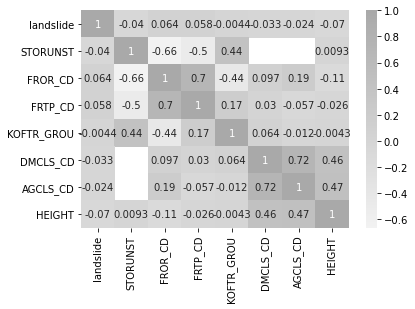

In [ ]:
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(result_gyeongbuk1_drop_f.corr(), annot=True, cmap=cmap)
plt.show()


In [ ]:
result_gyeongbuk1_drop_f_dn = result_gyeongbuk1_drop_f.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389446 entries, 186 to 433193
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   landslide   389446 non-null  float64
 1   STORUNST    389446 non-null  float64
 2   FROR_CD     389446 non-null  float64
 3   FRTP_CD     389446 non-null  float64
 4   KOFTR_GROU  389446 non-null  float64
 5   DMCLS_CD    389446 non-null  float64
 6   AGCLS_CD    389446 non-null  float64
 7   HEIGHT      389446 non-null  float64
dtypes: float64(8)
memory usage: 26.7 MB


## 상관계수 구하기 (1:1 매칭)

In [ ]:
#결측치 확인
tree_gyeongbuk1.isna().sum()
tree_gyeongbuk1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 433195 entries, 0 to 433194
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   STORUNST    433195 non-null  object  
 1   FROR_CD     433195 non-null  object  
 2   FRTP_CD     433195 non-null  object  
 3   KOFTR_GROU  433195 non-null  object  
 4   DMCLS_CD    372303 non-null  object  
 5   AGCLS_CD    372303 non-null  object  
 6   DNST_CD     372303 non-null  object  
 7   HEIGHT      370566 non-null  object  
 8   LDMARK_STN  433195 non-null  object  
 9   MAP_LABEL   433195 non-null  object  
 10  ETC_PCMTT   33975 non-null   object  
 11  geometry    433195 non-null  geometry
dtypes: geometry(1), object(11)
memory usage: 39.7+ MB


In [ ]:
#불필요한 na값이 많은 행 제거
tree_gyeongbuk1 = tree_gyeongbuk1.fillna(0)
tree_gyeongbuk2 = tree_gyeongbuk2.fillna(0)
tree_gyeongnam = tree_gyeongnam.fillna(0)
#tree_gyeongbuk1 = tree_gyeongbuk1.drop('ETC_PCMTT', axis=1)
#tree_gyeongbuk2 = tree_gyeongbuk2.drop('ETC_PCMTT', axis=1)
#tree_gyeongnam = tree_gyeongnam.drop('ETC_PCMTT', axis=1)
#tree_gyeongbuk1.info()
#결측치 제거
#tree_gyeongbuk1 = tree_gyeongbuk2.dropna(how='any')
#tree_gyeongbuk2 = tree_gyeongbuk2.dropna(how='any')
#tree_gyeongnam = tree_gyeongnam.dropna(how='any')


In [ ]:
#결측치 제거 확인
tree_gyeongbuk1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 433195 entries, 0 to 433194
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   STORUNST    433195 non-null  object  
 1   FROR_CD     433195 non-null  object  
 2   FRTP_CD     433195 non-null  object  
 3   KOFTR_GROU  433195 non-null  object  
 4   DMCLS_CD    433195 non-null  object  
 5   AGCLS_CD    433195 non-null  object  
 6   DNST_CD     433195 non-null  object  
 7   HEIGHT      433195 non-null  object  
 8   LDMARK_STN  433195 non-null  object  
 9   MAP_LABEL   433195 non-null  object  
 10  ETC_PCMTT   433195 non-null  object  
 11  geometry    433195 non-null  geometry
dtypes: geometry(1), object(11)
memory usage: 39.7+ MB


In [ ]:
result_h_s = gpd.sjoin(hangjung_gubun, tree_gyeongbuk1, how='right', op='intersects')
result_h_s

,index_left,BASE_DATE,ADM_DR_CD,ADM_DR_NM,시,umd2,sum_cnt,landslide,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT,LDMARK_STN,MAP_LABEL,ETC_PCMTT,geometry
0,5,20200630,3701133,장기면,포항시 남구,포항시 남구 장기면,1,1,0,0,0,91,0,0,0,0,J00091,S,0,"POLYGON ((1180026.099 1765809.253, 1180027.105..."
1,5,20200630,3701133,장기면,포항시 남구,포항시 남구 장기면,1,1,0,0,0,91,0,0,0,0,J00091,S,0,"POLYGON ((1174750.716 1769783.009, 1174751.527..."
2,0,20200630,3701111,구룡포읍,포항시 남구,포항시 남구 구룡포읍,0,0,0,0,0,91,0,0,0,0,J00091,S,0,"POLYGON ((1181314.554 1773009.771, 1181315.481..."
2,5,20200630,3701133,장기면,포항시 남구,포항시 남구 장기면,1,1,0,0,0,91,0,0,0,0,J00091,S,0,"POLYGON ((1181314.554 1773009.771, 1181315.481..."
3,3,20200630,3701131,대송면,포항시 남구,포항시 남구 대송면,1,1,0,0,0,91,0,0,0,0,J00091,S,0,"POLYGON ((1166827.025 1775663.534, 1166827.354..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433190,199,20200630,3710012,진량읍,경산시,경산시 진량읍,0,0,2,0,0,82,0,0,0,0,J20082,R,0,"POLYGON ((1121443.269 1763178.694, 1121442.463..."
433191,201,20200630,3710031,와촌면,경산시,경산시 와촌면,0,0,1,2,2,30,2,5,C,18,J12230,NEB-25C,0,"POLYGON ((1114001.821 1772473.345, 1114000.524..."
433192,201,20200630,3710031,와촌면,경산시,경산시 와촌면,0,0,1,2,2,34,2,5,C,18,J12234,NQQ-25C,0,"POLYGON ((1114001.821 1772473.345, 1114000.524..."
433193,199,20200630,3710012,진량읍,경산시,경산시 진량읍,0,0,1,2,3,77,2,5,C,16,J12377,NMM-25C,0,"POLYGON ((1123823.683 1763522.260, 1123825.183..."


In [ ]:
result_h_s["area"] = result_h_s.geometry.area
result_h_s

,index_left,BASE_DATE,ADM_DR_CD,ADM_DR_NM,시,umd2,sum_cnt,landslide,STORUNST,FROR_CD,...,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT,LDMARK_STN,MAP_LABEL,ETC_PCMTT,geometry,area
0,5,20200630,3701133,장기면,포항시 남구,포항시 남구 장기면,1,1,0,0,...,91,0,0,0,0,J00091,S,0,"POLYGON ((1180026.099 1765809.253, 1180027.105...",2245.361159
1,5,20200630,3701133,장기면,포항시 남구,포항시 남구 장기면,1,1,0,0,...,91,0,0,0,0,J00091,S,0,"POLYGON ((1174750.716 1769783.009, 1174751.527...",3593.640299
2,0,20200630,3701111,구룡포읍,포항시 남구,포항시 남구 구룡포읍,0,0,0,0,...,91,0,0,0,0,J00091,S,0,"POLYGON ((1181314.554 1773009.771, 1181315.481...",9340.874495
2,5,20200630,3701133,장기면,포항시 남구,포항시 남구 장기면,1,1,0,0,...,91,0,0,0,0,J00091,S,0,"POLYGON ((1181314.554 1773009.771, 1181315.481...",9340.874495
3,3,20200630,3701131,대송면,포항시 남구,포항시 남구 대송면,1,1,0,0,...,91,0,0,0,0,J00091,S,0,"POLYGON ((1166827.025 1775663.534, 1166827.354...",259.606420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433190,199,20200630,3710012,진량읍,경산시,경산시 진량읍,0,0,2,0,...,82,0,0,0,0,J20082,R,0,"POLYGON ((1121443.269 1763178.694, 1121442.463...",0.001090
433191,201,20200630,3710031,와촌면,경산시,경산시 와촌면,0,0,1,2,...,30,2,5,C,18,J12230,NEB-25C,0,"POLYGON ((1114001.821 1772473.345, 1114000.524...",0.001427
433192,201,20200630,3710031,와촌면,경산시,경산시 와촌면,0,0,1,2,...,34,2,5,C,18,J12234,NQQ-25C,0,"POLYGON ((1114001.821 1772473.345, 1114000.524...",0.001427
433193,199,20200630,3710012,진량읍,경산시,경산시 진량읍,0,0,1,2,...,77,2,5,C,16,J12377,NMM-25C,0,"POLYGON ((1123823.683 1763522.260, 1123825.183...",0.001691


In [ ]:
rmp = result_h_s.groupby('umd2')['area'].agg(**{'area':'max'}).reset_index()
rmp

,umd2,area
0,거창군 가북면,4.664923e+05
1,거창군 고제면,9.970476e+04
2,거창군 웅양면,3.702005e+05
3,경산시 남부동,2.089471e+05
4,경산시 남산면,5.504708e+05
...,...,...
258,포항시 북구 죽장면,8.101806e+05
259,포항시 북구 중앙동,1.121074e+05
260,포항시 북구 청하면,2.536393e+06
261,포항시 북구 환여동,2.484205e+05


In [ ]:
merge_outer = pd.merge(result_h_s,rmp,on=['umd2','area'])
merge_outer

,index_left,BASE_DATE,ADM_DR_CD,ADM_DR_NM,시,umd2,sum_cnt,landslide,STORUNST,FROR_CD,...,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT,LDMARK_STN,MAP_LABEL,ETC_PCMTT,geometry,area
0,4,20200630,3701132,동해면,포항시 남구,포항시 남구 동해면,0,0,1,2,...,15,1,3,C,0,J12115,NPT-13C,b'\xbc\xf6\xb0\xed\xc3\xf8\xc1\xa4\xba\xd2\xb0...,"POLYGON ((1174141.624 1778557.388, 1174142.555...",409787.702001
1,8,20200630,3701156,청림동,포항시 남구,포항시 남구 청림동,0,0,1,2,...,15,1,3,C,0,J12115,NPT-13C,b'\xbc\xf6\xb0\xed\xc3\xf8\xc1\xa4\xba\xd2\xb0...,"POLYGON ((1174141.624 1778557.388, 1174142.555...",409787.702001
2,1,20200630,3701112,연일읍,포항시 남구,포항시 남구 연일읍,2,1,1,2,...,15,2,4,C,12,J12115,NPT-24C,0,"POLYGON ((1161070.729 1784952.222, 1161072.882...",157073.393819
3,7,20200630,3701155,송도동,포항시 남구,포항시 남구 송도동,0,0,1,2,...,15,2,5,C,14,J12115,NPT-25C,0,"POLYGON ((1168914.993 1784795.675, 1168915.744...",51199.926213
4,6,20200630,3701135,호미곶면,포항시 남구,포항시 남구 호미곶면,0,0,1,2,...,30,1,2,B,10,J12230,NEB-12B,0,"POLYGON ((1183500.883 1784155.943, 1183501.581...",379711.582285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,200,20200630,3710013,압량읍,경산시,경산시 압량읍,0,0,1,2,...,11,3,5,C,0,J12111,NPD-35C,b'\xbc\xf6\xb0\xed\xc3\xf8\xc1\xa4\xba\xd2\xb0...,"POLYGON ((1116660.094 1759315.404, 1116665.241...",77233.423084
259,198,20200630,3710011,하양읍,경산시,경산시 하양읍,0,0,1,2,...,30,1,3,C,10,J12230,NEB-13C,0,"MULTIPOLYGON (((1113170.603 1769490.864, 11131...",444160.760536
260,201,20200630,3710031,와촌면,경산시,경산시 와촌면,0,0,1,2,...,30,2,5,C,18,J12230,NEB-25C,0,"POLYGON ((1114765.091 1772758.852, 1114762.870...",381022.767647
261,199,20200630,3710012,진량읍,경산시,경산시 진량읍,0,0,1,2,...,33,2,5,C,20,J12233,NQV-25C,0,"MULTIPOLYGON (((1124379.132 1762421.516, 11243...",629671.726893


In [ ]:
result_h_s.groupby('umd2')['KOFTR_GROU'].agg(**{
    'most_common_value':lambda x:x.mode()
}).reset_index()

,umd2,most_common_value
0,거창군 가북면,34
1,거창군 고제면,30
2,거창군 웅양면,77
3,경산시 남부동,30
4,경산시 남산면,82
...,...,...
258,포항시 북구 죽장면,34
259,포항시 북구 중앙동,30
260,포항시 북구 청하면,11
261,포항시 북구 환여동,15


In [ ]:
result_h_s1 = gpd.sjoin(hangjung_gubun, tree_gyeongbuk2, how='right', op='intersects')
result_h_s1

,index_left,BASE_DATE,ADM_DR_CD,ADM_DR_NM,시,umd2,sum_cnt,landslide,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT,LDMARK_STN,MAP_LABEL,ETC_PCMTT,geometry
0,214.0,20200630,3731031,소보면,군위군,군위군 소보면,0.0,0.0,1,1,2,37,1,2,B,10,J11237,ABP-12B,0,"POLYGON ((1090347.582 1799459.171, 1090350.074..."
1,105.0,20200630,3705036,장천면,구미시,구미시 장천면,0.0,0.0,1,2,2,34,2,4,B,12,J12234,NQQ-24B,0,"MULTIPOLYGON (((1090692.370 1799343.503, 10906..."
1,214.0,20200630,3731031,소보면,군위군,군위군 소보면,0.0,0.0,1,2,2,34,2,4,B,12,J12234,NQQ-24B,0,"MULTIPOLYGON (((1090692.370 1799343.503, 10906..."
2,104.0,20200630,3705035,산동면,구미시,구미시 산동면,0.0,0.0,1,2,3,77,1,2,C,10,J12377,NMM-12C,0,"POLYGON ((1090186.745 1799410.071, 1090192.495..."
2,105.0,20200630,3705036,장천면,구미시,구미시 장천면,0.0,0.0,1,2,3,77,1,2,C,10,J12377,NMM-12C,0,"POLYGON ((1090186.745 1799410.071, 1090192.495..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355841,331.0,20200630,3743032,북면,울릉군,울릉군 북면,2.0,1.0,2,0,0,82,0,0,0,0,J20082,R,0,"POLYGON ((1301163.063 1954826.757, 1301166.224..."
355842,330.0,20200630,3743031,서면,울릉군,울릉군 서면,0.0,0.0,2,0,0,82,0,0,0,0,J20082,R,b'2017\xbf\xb5\xbb\xf3\xc6\xc7\xb5\xb6',"POLYGON ((1296444.267 1946171.247, 1296445.130..."
355843,330.0,20200630,3743031,서면,울릉군,울릉군 서면,0.0,0.0,2,0,0,82,0,0,0,0,J20082,R,b'2017\xbf\xb5\xbb\xf3\xc6\xc7\xb5\xb6',"POLYGON ((1294571.827 1946483.227, 1294573.806..."
355844,330.0,20200630,3743031,서면,울릉군,울릉군 서면,0.0,0.0,2,0,0,82,0,0,0,0,J20082,R,b'2017\xbf\xb5\xbb\xf3\xc6\xc7\xb5\xb6',"POLYGON ((1291582.379 1951751.048, 1291586.135..."


In [ ]:
result_h_s1["area"] = result_h_s1.geometry.area
rmp1 = result_h_s1.groupby('umd2')['area'].agg(**{'area':'max'}).reset_index()
merge_outer1 = pd.merge(result_h_s1,rmp1,on=['umd2','area'])
merge_outer1

,index_left,BASE_DATE,ADM_DR_CD,ADM_DR_NM,시,umd2,sum_cnt,landslide,STORUNST,FROR_CD,...,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT,LDMARK_STN,MAP_LABEL,ETC_PCMTT,geometry,area
0,216.0,20200630,3731033,부계면,군위군,군위군 부계면,0.0,0.0,1,2,...,11,2,4,C,12,J12111,NPD-24C,0,"POLYGON ((1104393.032 1793082.623, 1104396.187...",1.237054e+06
1,217.0,20200630,3731034,우보면,군위군,군위군 우보면,0.0,0.0,1,2,...,11,2,4,C,12,J12111,NPD-24C,0,"POLYGON ((1104393.032 1793082.623, 1104396.187...",1.237054e+06
2,219.0,20200630,3731036,산성면,군위군,군위군 산성면,0.0,0.0,1,2,...,11,2,4,C,12,J12111,NPD-24C,0,"POLYGON ((1104393.032 1793082.623, 1104396.187...",1.237054e+06
3,149.0,20200630,3707035,화남면,영천시,영천시 화남면,0.0,0.0,1,2,...,30,1,3,B,10,J12230,NEB-13B,0,"POLYGON ((1123228.577 1796152.332, 1123230.770...",2.203995e+05
4,146.0,20200630,3707032,신녕면,영천시,영천시 신녕면,0.0,0.0,1,2,...,30,1,3,C,10,J12230,NEB-13C,0,"MULTIPOLYGON (((1117934.841 1788789.348, 11179...",1.025126e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,319.0,20200630,3742011,울진읍,울진군,울진군 울진읍,36.0,1.0,1,2,...,11,3,6,C,10,J12111,NPD-36C,0,"POLYGON ((1161729.595 1893865.954, 1161729.895...",3.384857e+06
179,325.0,20200630,3742037,죽변면,울진군,울진군 죽변면,7.0,1.0,1,2,...,11,3,6,C,10,J12111,NPD-36C,0,"POLYGON ((1166990.809 1898711.878, 1166992.647...",2.721945e+05
180,329.0,20200630,3743011,울릉읍,울릉군,울릉군 울릉읍,1.0,1.0,1,2,...,30,1,5,C,16,J12230,NEB-15C,0,"POLYGON ((1298005.304 1952596.988, 1298011.683...",1.819176e+06
181,331.0,20200630,3743032,북면,울릉군,울릉군 북면,2.0,1.0,1,2,...,30,1,5,C,16,J12230,NEB-15C,0,"POLYGON ((1298005.304 1952596.988, 1298011.683...",1.819176e+06


In [ ]:
result_h_s2 = gpd.sjoin(hangjung_gubun, tree_gyeongnam, how='right', op='intersects')
result_h_s2["area"] = result_h_s2.geometry.area
rmp2 = result_h_s2.groupby('umd2')['area'].agg(**{'area':'max'}).reset_index()
merge_outer2 = pd.merge(result_h_s2,rmp2,on=['umd2','area'])
merge_outer2

,index_left,BASE_DATE,ADM_DR_CD,ADM_DR_NM,시,umd2,sum_cnt,landslide,STORUNST,FROR_CD,...,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT,LDMARK_STN,MAP_LABEL,ETC_PCMTT,geometry,area
0,461.0,20200630,3811152,팔룡동,창원시 의창구,창원시 의창구 팔룡동,0.0,0.0,1,2,...,11,2,4,C,00,J12111,NPD-24C,b'\xbc\xf6\xb0\xed\xc3\xf8\xc1\xa4\xba\xd2\xb0...,"MULTIPOLYGON (((1101905.365 1693890.648, 11019...",4.430543e+05
1,466.0,20200630,3811252,중앙동,창원시 성산구,창원시 성산구 중앙동,0.0,0.0,1,2,...,11,2,5,C,18,J12111,NPD-25C,0,"POLYGON ((1105606.463 1693338.263, 1105617.587...",5.068166e+04
2,464.0,20200630,3811155,용지동,창원시 의창구,창원시 의창구 용지동,0.0,0.0,1,2,...,15,2,4,C,14,J12115,NPT-24C,0,"POLYGON ((1107458.868 1693850.681, 1107458.198...",4.419117e+04
3,462.0,20200630,3811153,명곡동,창원시 의창구,창원시 의창구 명곡동,0.0,0.0,1,2,...,30,2,4,C,00,J12230,NEB-24C,b'\xbc\xf6\xb0\xed\xc3\xf8\xc1\xa4\xba\xd2\xb0...,"POLYGON ((1102792.754 1695781.282, 1102795.726...",1.829273e+05
4,496.0,20200630,3811461,구암2동,창원시 마산회원구,창원시 마산회원구 구암2동,0.0,0.0,1,2,...,30,2,5,C,16,J12230,NEB-25C,0,"POLYGON ((1100405.071 1695267.229, 1100409.692...",7.075224e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,628.0,20200630,3840038,덕곡면,합천군,합천군 덕곡면,0.0,0.0,1,2,...,11,2,4,C,12,J12111,NPD-24C,0,"POLYGON ((1076722.427 1735779.269, 1076744.594...",1.097763e+06
310,629.0,20200630,3840039,청덕면,합천군,합천군 청덕면,3.0,1.0,1,2,...,11,2,4,C,12,J12111,NPD-24C,0,"POLYGON ((1073872.464 1734224.440, 1073870.765...",1.772494e+06
311,627.0,20200630,3840037,쌍책면,합천군,합천군 쌍책면,1.0,1.0,1,2,...,11,2,4,C,14,J12111,NPD-24C,0,"POLYGON ((1071143.674 1735638.858, 1071146.267...",1.068257e+06
312,277.0,20200630,3737036,우곡면,고령군,고령군 우곡면,1.0,1.0,1,2,...,11,2,4,C,14,J12111,NPD-24C,0,"POLYGON ((1073653.576 1739870.007, 1073656.539...",3.596650e+05


In [ ]:
sum_hgb = pd.concat([merge_outer1, merge_outer])
sum_hg = pd.concat([sum_hgb, merge_outer2])
sum_hg.reset_index()

,index,index_left,BASE_DATE,ADM_DR_CD,ADM_DR_NM,시,umd2,sum_cnt,landslide,STORUNST,...,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT,LDMARK_STN,MAP_LABEL,ETC_PCMTT,geometry,area
0,0,216.0,20200630,3731033,부계면,군위군,군위군 부계면,0.0,0.0,1,...,11,2,4,C,12,J12111,NPD-24C,0,"POLYGON ((1104393.032 1793082.623, 1104396.187...",1.237054e+06
1,1,217.0,20200630,3731034,우보면,군위군,군위군 우보면,0.0,0.0,1,...,11,2,4,C,12,J12111,NPD-24C,0,"POLYGON ((1104393.032 1793082.623, 1104396.187...",1.237054e+06
2,2,219.0,20200630,3731036,산성면,군위군,군위군 산성면,0.0,0.0,1,...,11,2,4,C,12,J12111,NPD-24C,0,"POLYGON ((1104393.032 1793082.623, 1104396.187...",1.237054e+06
3,3,149.0,20200630,3707035,화남면,영천시,영천시 화남면,0.0,0.0,1,...,30,1,3,B,10,J12230,NEB-13B,0,"POLYGON ((1123228.577 1796152.332, 1123230.770...",2.203995e+05
4,4,146.0,20200630,3707032,신녕면,영천시,영천시 신녕면,0.0,0.0,1,...,30,1,3,C,10,J12230,NEB-13C,0,"MULTIPOLYGON (((1117934.841 1788789.348, 11179...",1.025126e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,309,628.0,20200630,3840038,덕곡면,합천군,합천군 덕곡면,0.0,0.0,1,...,11,2,4,C,12,J12111,NPD-24C,0,"POLYGON ((1076722.427 1735779.269, 1076744.594...",1.097763e+06
756,310,629.0,20200630,3840039,청덕면,합천군,합천군 청덕면,3.0,1.0,1,...,11,2,4,C,12,J12111,NPD-24C,0,"POLYGON ((1073872.464 1734224.440, 1073870.765...",1.772494e+06
757,311,627.0,20200630,3840037,쌍책면,합천군,합천군 쌍책면,1.0,1.0,1,...,11,2,4,C,14,J12111,NPD-24C,0,"POLYGON ((1071143.674 1735638.858, 1071146.267...",1.068257e+06
758,312,277.0,20200630,3737036,우곡면,고령군,고령군 우곡면,1.0,1.0,1,...,11,2,4,C,14,J12111,NPD-24C,0,"POLYGON ((1073653.576 1739870.007, 1073656.539...",3.596650e+05


In [ ]:
merg = sum_hg.groupby('umd2')['area'].agg(**{'area':'max'}).reset_index()
merg

,umd2,area
0,거제시 거제면,6.735903e+05
1,거제시 고현동,1.298222e+05
2,거제시 남부면,4.506728e+05
3,거제시 능포동,2.309076e+05
4,거제시 동부면,6.735903e+05
...,...,...
620,합천군 율곡면,6.173399e+05
621,합천군 적중면,1.535843e+06
622,합천군 청덕면,1.772494e+06
623,합천군 초계면,1.535843e+06


In [ ]:
sum_hg_all = pd.merge(sum_hg,merg,on=['umd2','area'])
sum_hg_all

,index_left,BASE_DATE,ADM_DR_CD,ADM_DR_NM,시,umd2,sum_cnt,landslide,STORUNST,FROR_CD,...,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT,LDMARK_STN,MAP_LABEL,ETC_PCMTT,geometry,area
0,216.0,20200630,3731033,부계면,군위군,군위군 부계면,0.0,0.0,1,2,...,11,2,4,C,12,J12111,NPD-24C,0,"POLYGON ((1104393.032 1793082.623, 1104396.187...",1.237054e+06
1,217.0,20200630,3731034,우보면,군위군,군위군 우보면,0.0,0.0,1,2,...,11,2,4,C,12,J12111,NPD-24C,0,"POLYGON ((1104393.032 1793082.623, 1104396.187...",1.237054e+06
2,219.0,20200630,3731036,산성면,군위군,군위군 산성면,0.0,0.0,1,2,...,11,2,4,C,12,J12111,NPD-24C,0,"POLYGON ((1104393.032 1793082.623, 1104396.187...",1.237054e+06
3,146.0,20200630,3707032,신녕면,영천시,영천시 신녕면,0.0,0.0,1,2,...,30,1,3,C,10,J12230,NEB-13C,0,"MULTIPOLYGON (((1117934.841 1788789.348, 11179...",1.025126e+06
4,147.0,20200630,3707033,화산면,영천시,영천시 화산면,0.0,0.0,1,2,...,30,1,3,C,10,J12230,NEB-13C,0,"MULTIPOLYGON (((1117934.841 1788789.348, 11179...",1.025126e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,624.0,20200630,3840034,야로면,합천군,합천군 야로면,8.0,1.0,1,2,...,11,2,5,C,12,J12111,NPD-25C,0,"MULTIPOLYGON (((1060516.580 1751787.714, 10605...",2.846212e+06
621,622.0,20200630,3840032,묘산면,합천군,합천군 묘산면,6.0,1.0,1,2,...,34,2,5,C,12,J12234,NQQ-25C,0,"POLYGON ((1052697.603 1742941.628, 1052700.102...",6.486284e+05
622,628.0,20200630,3840038,덕곡면,합천군,합천군 덕곡면,0.0,0.0,1,2,...,11,2,4,C,12,J12111,NPD-24C,0,"POLYGON ((1076722.427 1735779.269, 1076744.594...",1.097763e+06
623,629.0,20200630,3840039,청덕면,합천군,합천군 청덕면,3.0,1.0,1,2,...,11,2,4,C,12,J12111,NPD-24C,0,"POLYGON ((1073872.464 1734224.440, 1073870.765...",1.772494e+06


In [ ]:
sum_tree_final = sum_hg_all.drop(['index_left','geometry','area'], axis=1)
sum_tree_final.rename(columns = {'시' : 'sgg'})

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,sgg,umd2,sum_cnt,landslide,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT,LDMARK_STN,MAP_LABEL,ETC_PCMTT
0,20200630,3731033,부계면,군위군,군위군 부계면,0.0,0.0,1,2,1,11,2,4,C,12,J12111,NPD-24C,0
1,20200630,3731034,우보면,군위군,군위군 우보면,0.0,0.0,1,2,1,11,2,4,C,12,J12111,NPD-24C,0
2,20200630,3731036,산성면,군위군,군위군 산성면,0.0,0.0,1,2,1,11,2,4,C,12,J12111,NPD-24C,0
3,20200630,3707032,신녕면,영천시,영천시 신녕면,0.0,0.0,1,2,2,30,1,3,C,10,J12230,NEB-13C,0
4,20200630,3707033,화산면,영천시,영천시 화산면,0.0,0.0,1,2,2,30,1,3,C,10,J12230,NEB-13C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,20200630,3840034,야로면,합천군,합천군 야로면,8.0,1.0,1,2,1,11,2,5,C,12,J12111,NPD-25C,0
621,20200630,3840032,묘산면,합천군,합천군 묘산면,6.0,1.0,1,2,2,34,2,5,C,12,J12234,NQQ-25C,0
622,20200630,3840038,덕곡면,합천군,합천군 덕곡면,0.0,0.0,1,2,1,11,2,4,C,12,J12111,NPD-24C,0
623,20200630,3840039,청덕면,합천군,합천군 청덕면,3.0,1.0,1,2,1,11,2,4,C,12,J12111,NPD-24C,0


In [ ]:
sum_tree_final = sum_tree_final.loc[sum_tree_final["umd2"].isin(hangjung_gubun["umd2"])]
sum_tree_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 625 entries, 0 to 624
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BASE_DATE   625 non-null    object 
 1   ADM_DR_CD   625 non-null    object 
 2   ADM_DR_NM   625 non-null    object 
 3   시           625 non-null    object 
 4   umd2        625 non-null    object 
 5   sum_cnt     625 non-null    float64
 6   landslide   625 non-null    float64
 7   STORUNST    625 non-null    object 
 8   FROR_CD     625 non-null    object 
 9   FRTP_CD     625 non-null    object 
 10  KOFTR_GROU  625 non-null    object 
 11  DMCLS_CD    625 non-null    object 
 12  AGCLS_CD    625 non-null    object 
 13  DNST_CD     625 non-null    object 
 14  HEIGHT      625 non-null    object 
 15  LDMARK_STN  625 non-null    object 
 16  MAP_LABEL   625 non-null    object 
 17  ETC_PCMTT   625 non-null    object 
dtypes: float64(2), object(16)
memory usage: 92.8+ KB


In [ ]:
merge_hg = pd.merge(sum_tree_final,hangjung_gubun,how='outer',on=['umd2', 'BASE_DATE', 'ADM_DR_CD', 'ADM_DR_NM', '시', 'sum_cnt', 'landslide'])
merge_hg

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,시,umd2,sum_cnt,landslide,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT,LDMARK_STN,MAP_LABEL,ETC_PCMTT,geometry
0,20200630,3731033,부계면,군위군,군위군 부계면,0.0,0.0,1,2,1,11,2,4,C,12,J12111,NPD-24C,0,"POLYGON ((1105138.300 1792624.280, 1105246.903..."
1,20200630,3731034,우보면,군위군,군위군 우보면,0.0,0.0,1,2,1,11,2,4,C,12,J12111,NPD-24C,0,"POLYGON ((1104481.109 1803197.883, 1104473.689..."
2,20200630,3731036,산성면,군위군,군위군 산성면,0.0,0.0,1,2,1,11,2,4,C,12,J12111,NPD-24C,0,"POLYGON ((1109794.144 1795517.526, 1109810.021..."
3,20200630,3707032,신녕면,영천시,영천시 신녕면,0.0,0.0,1,2,2,30,1,3,C,10,J12230,NEB-13C,0,"POLYGON ((1118346.838 1789128.685, 1118507.014..."
4,20200630,3707033,화산면,영천시,영천시 화산면,0.0,0.0,1,2,2,30,1,3,C,10,J12230,NEB-13C,0,"POLYGON ((1120236.931 1790073.876, 1120251.228..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,20200630,3710056,중방동,경산시,경산시 중방동,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((1112087.378 1760848.425, 1112082.477..."
633,20200630,3803065,상평동,진주시,진주시 상평동,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((1057421.002 1687250.000, 1057422.968..."
634,20200630,3803068,신안동,진주시,진주시 신안동,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((1052000.324 1688426.883, 1052007.400..."
635,20200630,3810059,양주동,양산시,양산시 양주동,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((1139172.719 1706362.526, 1139178.541..."


In [ ]:
# 데이터 변수명 변경
sum_hg_all.rename(columns={'ADM_DR_NM':'umd', '시' : 'sgg'}, inplace=True)
# 객관적으로 불필요한 변수 제거
drop_hg_all = sum_hg_all.drop(["geometry", "index_left", "area"], axis=1)
# 주관적으로 불필요한 변수 제거
sum_hg_all_csv = drop_hg_all.drop(["BASE_DATE", "ETC_PCMTT",'LDMARK_STN', "MAP_LABEL", "ADM_DR_CD", "sum_cnt"], axis=1)
# 결측치에 0값 배치
sum_hg_all_csv = sum_hg_all_csv.fillna(0)
sum_hg_all_csv.head()
# csv 파일로 저장
sum_hg_all_csv.to_csv("tree_sum_final.csv",encoding='utf-8-sig',index=False)

In [ ]:
tree_sum_final.head()

,umd,sgg,umd2,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT
0,부계면,군위군,군위군 부계면,1,2,1,11,2,4,C,12
1,우보면,군위군,군위군 우보면,1,2,1,11,2,4,C,12
2,산성면,군위군,군위군 산성면,1,2,1,11,2,4,C,12
3,신녕면,영천시,영천시 신녕면,1,2,2,30,1,3,C,10
4,화산면,영천시,영천시 화산면,1,2,2,30,1,3,C,10
